<a href="https://colab.research.google.com/github/kartik2627/Machine-Learning/blob/main/linear_regression_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Untitled form (File responses) (1)/ml/3-Complete Linear Regression/Practicals/height-weight.csv')

In [4]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


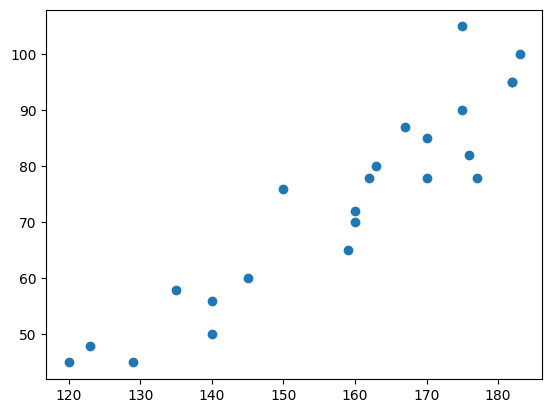

In [5]:
plt.scatter(data["Height"],data["Weight"])

In [7]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [8]:
data.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
data.shape

(23, 2)

In [10]:
data.isnull()

,Weight,Height
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


<Axes: >

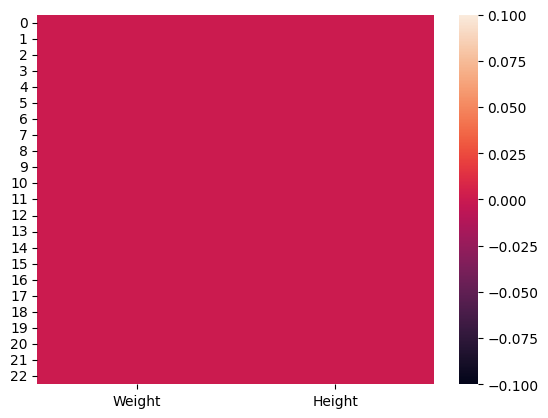

In [11]:
import seaborn as sns
sns.heatmap(data.isnull())

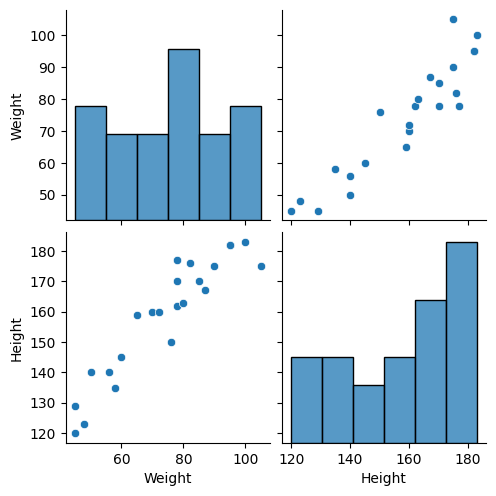

In [12]:
sns.pairplot(data)

In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
np.array(X)

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [17]:
X_test.head()


,Weight
15,78
9,78
0,45
8,95
17,65


In [18]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Fit the model to your training data
lr.fit(X_train, y_train)


LinearRegression()

In [21]:
lr.coef_

array([17.03440872])

In [22]:
lr.intercept_

157.5

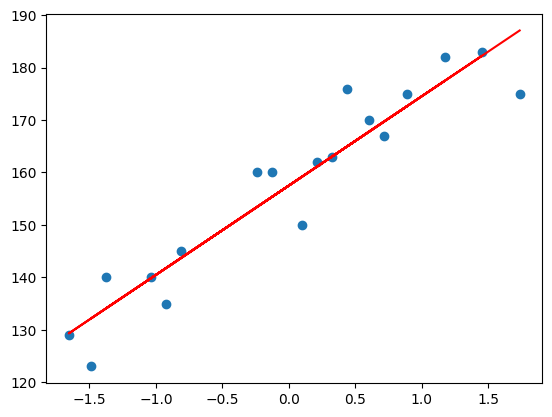

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color='red')

In [24]:
y_predict = lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
R2 = r2_score(y_test,y_predict)

In [26]:
print(MSE,MAE,R2)

109.77592599051664 9.822657814519232 0.776986986042344


In [27]:
import statsmodels.api as sm

In [28]:
model = sm.OLS(y_train,X_train).fit()

In [29]:
prediction = model.predict(X_test)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                       0.661
Time:                        19:15:49   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [31]:
lr.predict([[160]])

array([2883.00539506])

In [33]:
lr.predict(sc.transform([[160]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([240.05443479])